# Imports

In [298]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV

# Dataset

In [299]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv('dataset.csv')
print('Data set shape:', df.shape)

Data set shape: (1477, 28)


In [300]:
# Display the first few rows of the DataFrame
df.head()

,Body_Level,Gender,Age,Height,Weight,H_Cal_Consump,Veg_Consump,Water_Consump,Smoking,Meal_Count,...,Food_Between_Meals_Always,Food_Between_Meals_Frequently,Food_Between_Meals_Sometimes,Food_Between_Meals_no,Transport_Automobile,Transport_Bike,Transport_Motorbike,Transport_Public_Transportation,Transport_Walking,BMI
0,3,1,0.646666,0.690578,1.016135,1,-0.199318,0.236558,0,0.402155,...,0,0,1,0,1,0,0,0,0,0.823278
1,3,1,-0.649582,-0.003364,0.686578,1,0.428856,-1.026715,0,-1.792121,...,0,0,1,0,0,0,0,1,0,0.806112
2,3,0,-0.537725,0.493657,1.790354,1,1.069487,1.401741,0,0.402155,...,0,0,1,0,0,0,0,1,0,1.751663
3,3,0,-1.291128,-0.545353,-0.036499,1,0.986227,-1.620907,0,0.402155,...,0,0,1,0,0,0,0,1,0,0.219426
4,3,0,0.270463,-0.818715,0.951256,1,1.069487,0.974150,0,0.402155,...,0,0,1,0,0,0,0,1,0,1.574457


In [301]:
#Label percentages
df['Body_Level'].value_counts(normalize=True)

3    0.460393
2    0.274882
1    0.136087
0    0.128639
Name: Body_Level, dtype: float64

In [302]:
# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(df.drop('Body_Level', axis=1), df['Body_Level'], test_size=0.2, random_state=42, stratify=df['Body_Level'])
# Print the shapes of the training and test sets
print('Training set shape:', X_train.shape)
print('Test set shape:', X_test.shape)

Training set shape: (1181, 27)
Test set shape: (296, 27)


In [303]:
#Label percentages
Y_train.value_counts(normalize=True)

3    0.460627
2    0.274344
1    0.136325
0    0.128704
Name: Body_Level, dtype: float64

In [304]:
#Label percentages
Y_test.value_counts(normalize=True)

3    0.459459
2    0.277027
1    0.135135
0    0.128378
Name: Body_Level, dtype: float64

# Common Functions

In [305]:
def apply_crossvalidation(model, X_train, Y_train, k=5):

    # create a k-fold cross-validation iterator
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    # perform k-fold cross-validation and compute accuracy
    scores = cross_val_score(model, X_train, Y_train, cv=kf, scoring='accuracy')
    # print the average accuracy score and its standard deviation
    print('Accuracy: {} +/- {}'.format(scores.mean(), scores.std()))

    # perform k-fold cross-validation and compute F1-score
    scores = cross_val_score(model, X_train, Y_train, cv=kf, scoring='f1_weighted')
    # print the average F1-score and its standard deviation
    print('F1-score: {} +/- {}'.format(scores.mean(), scores.std()))

In [306]:
def Evaluate(model, X_test, Y_test):
    
    # predict the class labels for the test set
    y_pred = model.predict(X_test)

    # calculate the accuracy
    accuracy = accuracy_score(Y_test, y_pred)

    # calculate the precision
    precision = precision_score(Y_test, y_pred, average='weighted')

    # calculate the recall
    recall = recall_score(Y_test, y_pred, average='weighted')

    # calculate the F1 score
    f1 = f1_score(Y_test, y_pred, average='weighted')

    # calculate the confusion matrix
    cm = confusion_matrix(Y_test, y_pred)

    # print the results
    print('Accuracy: {}'.format(accuracy))
    print('weighted F1 score: {}'.format(f1))
    print('weighted Precision: {}'.format(precision))
    print('weighted Recall: {}'.format(recall))
    print('Confusion matrix:\n', cm)

# Analysis With BMI feature

## Random Forest

learning curve

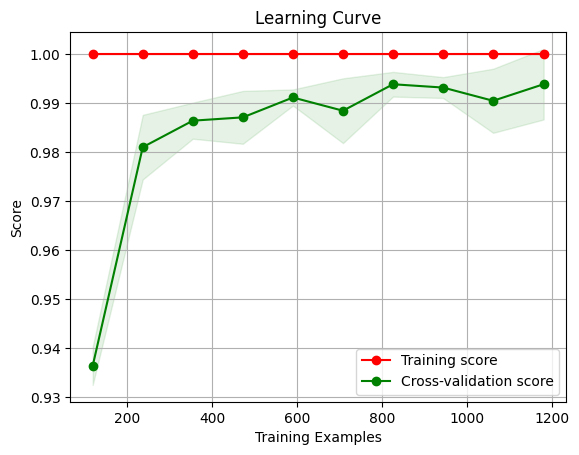

In [307]:
from sklearn.model_selection import learning_curve

# Load the data
X = df.drop('Body_Level', axis=1)
y = df['Body_Level']

# Create a random forest classifier
model = RandomForestClassifier(random_state=42)

# Define the number of training samples at each iteration
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate the mean and standard deviation of the training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.grid()

# Plot the mean training and test scores
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

# Plot the shaded area indicating the variance (± one standard deviation)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

# Add a legend
plt.legend(loc="best")

# Show the plot
plt.show()


bias variance analysis

In [308]:
from sklearn.ensemble import RandomForestClassifier
from mlxtend.evaluate import bias_variance_decomp

# Create a random forest classifier
model = RandomForestClassifier(random_state=42)

# Calculate bias and variance
mse, bias, variance = bias_variance_decomp(model, X_train.values, Y_train.values, X_test.values, Y_test.values, loss='mse', num_rounds=200, random_seed=42)

print("Mean Squared Error:", mse)
print("Bias:", bias)
print("Variance:", variance)

Mean Squared Error: 0.012550675675675676
Bias: 0.006902280405405406
Variance: 0.00564839527027027


simple fit and evaluate

In [309]:
# Create a random forest object
rf_base = RandomForestClassifier(random_state=42)

# Fit the model to the training data
rf_base.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [310]:
# Predict the labels of the test set
y_pred = rf_base.predict(X_test)

# Evaluate the model
Evaluate(rf_base, X_test, Y_test)

Accuracy: 0.9966216216216216
weighted F1 score: 0.9966104769902239
weighted Precision: 0.996662324975578
weighted Recall: 0.9966216216216216
Confusion matrix:
 [[ 38   0   0   0]
 [  0  39   1   0]
 [  0   0  82   0]
 [  0   0   0 136]]


In [311]:
# Save the model as a pickle file
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(rf_base, file)

In [312]:
# Load the model from the pickle file
with open('model.pkl', 'rb') as file:
    rf_loaded = pickle.load(file)

# Evaluate the loaded model
Evaluate(rf_loaded, X_test, Y_test)

Accuracy: 0.9966216216216216
weighted F1 score: 0.9966104769902239
weighted Precision: 0.996662324975578
weighted Recall: 0.9966216216216216
Confusion matrix:
 [[ 38   0   0   0]
 [  0  39   1   0]
 [  0   0  82   0]
 [  0   0   0 136]]


In [313]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf_base.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


Hyperparameter Tuning

- normally we would do a random search to narrow down the range of hyperparameters and then do a grid search to find the best hyperparameters
- since the model already has a good performance, we will just do a grid search

In [314]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [None],
    'max_features': ['sqrt', 'auto', 'log2', 1, 5, 10], #
    'min_samples_leaf': [1],
    'min_samples_split': [2],
    'n_estimators': [10, 100] # 
}
# Create a based model
rf = RandomForestClassifier(random_state=42)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2)

In [315]:
# Fit the grid search to the data
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [None],
                         'max_features': ['sqrt', 'auto', 'log2', 1, 5, 10],
                         'min_samples_leaf': [1], 'min_samples_split': [2],
                         'n_estimators': [10, 100]},
             verbose=2)

In [316]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [317]:
best_grid = RandomForestClassifier(**grid_search.best_params_, random_state=42)
best_grid.fit(X_train, Y_train)
Evaluate(best_grid, X_test, Y_test)

Accuracy: 0.9966216216216216
weighted F1 score: 0.9966104769902239
weighted Precision: 0.996662324975578
weighted Recall: 0.9966216216216216
Confusion matrix:
 [[ 38   0   0   0]
 [  0  39   1   0]
 [  0   0  82   0]
 [  0   0   0 136]]


# Analysis without BMI feature

In [318]:
# remove BMI feature from the train and test sets
X_train = X_train.drop('BMI', axis=1)
X_test = X_test.drop('BMI', axis=1)

## Random Forest

learning curve

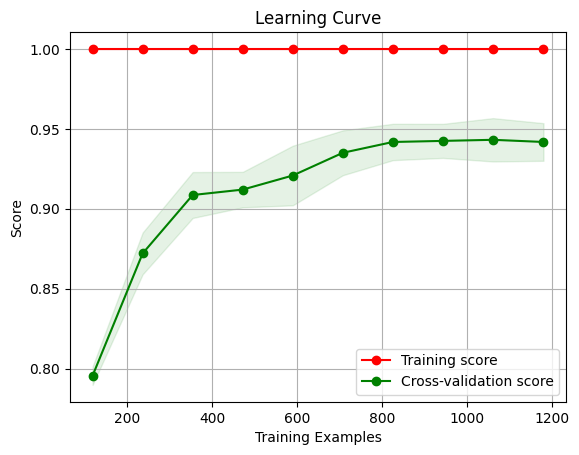

In [319]:
from sklearn.model_selection import learning_curve

# Load the data and drop BMI feature
X = df.drop(['Body_Level', 'BMI'], axis=1)
y = df['Body_Level']

# Create a random forest classifier
model = RandomForestClassifier(random_state=42)

# Define the number of training samples at each iteration
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate the mean and standard deviation of the training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.grid()

# Plot the mean training and test scores
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

# Plot the shaded area indicating the variance (± one standard deviation)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

# Add a legend
plt.legend(loc="best")

# Show the plot
plt.show()

bias variance analysis

In [320]:
from sklearn.ensemble import RandomForestClassifier
from mlxtend.evaluate import bias_variance_decomp

# Create a random forest classifier
model = RandomForestClassifier(random_state=42)

# Calculate bias and variance
mse, bias, variance = bias_variance_decomp(model, X_train.values, Y_train.values, X_test.values, Y_test.values, loss='mse', num_rounds=200, random_seed=42)

print("Mean Squared Error:", mse)
print("Bias:", bias)
print("Variance:", variance)

Mean Squared Error: 0.08616554054054054
Bias: 0.061024577702702705
Variance: 0.025140962837837837


simple fit and evaluate

In [321]:
# Create a random forest object
rf_base = RandomForestClassifier(random_state=42)

# Fit the model to the training data
rf_base.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [322]:
# Predict the labels of the test set
y_pred = rf_base.predict(X_test)

# Evaluate the model
Evaluate(rf_base, X_test, Y_test)

Accuracy: 0.9425675675675675
weighted F1 score: 0.9423784572056372
weighted Precision: 0.9435811836738044
weighted Recall: 0.9425675675675675
Confusion matrix:
 [[ 37   1   0   0]
 [  1  31   8   0]
 [  0   3  79   0]
 [  0   2   2 132]]


In [323]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf_base.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


Hyperparameter Tuning

- normally we would do a random search to narrow down the range of hyperparameters and then do a grid search to find the best hyperparameters
- since the model already has a good performance, we will just do a grid search

In [324]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [None],
    'max_features': ['sqrt', 'auto', 'log2'], #
    'min_samples_leaf': [1],
    'min_samples_split': [2],
    'n_estimators': [100, 200, 400, 800, 1000]  #
}
# Create a based model
rf = RandomForestClassifier(random_state=42)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [325]:
# Fit the grid search to the data
grid_search.fit(X_train, Y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [None],
                         'max_features': ['sqrt', 'auto', 'log2'],
                         'min_samples_leaf': [1], 'min_samples_split': [2],
                         'n_estimators': [100, 200, 400, 800, 1000]},
             verbose=2)

In [326]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 800}

In [327]:
best_grid = RandomForestClassifier(**grid_search.best_params_, random_state=42)
best_grid.fit(X_train, Y_train)
Evaluate(best_grid, X_test, Y_test)

Accuracy: 0.9459459459459459
weighted F1 score: 0.946327724312799
weighted Precision: 0.9472030169704589
weighted Recall: 0.9459459459459459
Confusion matrix:
 [[ 37   1   0   0]
 [  1  33   6   0]
 [  0   4  78   0]
 [  0   2   2 132]]


In [328]:
"""
We splitted the data into 80% training and 20% test sets.

BMI feature is one of the most important features for Random Forest model.

If we included the BMI feature the simple random forest model with default paramters 
achieves a weighted F1-score of 99.66% on the test set.

However, if we excluded the BMI feature achieves a weighted F1-score of 94.64% on the test set.

Since the random forest model using BMI with default paramters already achieves a very high accuracy and F1-score,
we tried to tune the hyperparameters around the default values using grid search and cross-validation,
but the hyperparameter tuning had insignificant effect on the accuracy and F1-score.

However, if we fine-tuned the models without BMI feature using grid search and cross-validation,
the weighted F1-score on the test set increased from 94.64% to 95.33% but still lower than the model with BMI feature.

The main hyperparameters that affect the performance of the random forest model are the number of trees in the forest and 
the max number of features considered for splitting a node.
"""

'\nWe splitted the data into 80% training and 20% test sets.\n\nBMI feature is one of the most important features for Random Forest model.\n\nIf we included the BMI feature the simple random forest model with default paramters \nachieves a weighted F1-score of 99.66% on the test set.\n\nHowever, if we excluded the BMI feature achieves a weighted F1-score of 94.64% on the test set.\n\nSince the random forest model using BMI with default paramters already achieves a very high accuracy and F1-score,\nwe tried to tune the hyperparameters around the default values using grid search and cross-validation,\nbut the hyperparameter tuning had insignificant effect on the accuracy and F1-score.\n\nHowever, if we fine-tuned the models without BMI feature using grid search and cross-validation,\nthe weighted F1-score on the test set increased from 94.64% to 95.33% but still lower than the model with BMI feature.\n\nThe main hyperparameters that affect the performance of the random forest model are t